In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [335]:
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [336]:
inputs = df.drop('salary_more_then_100k',axis='columns')
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [337]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [338]:
inputs['company'] = le_company.fit_transform(inputs['company'])
inputs['degree'] = le_degree.fit_transform(inputs['degree'])
inputs['job'] = le_job.fit_transform(inputs['job'])
inputs

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [339]:
y = df['salary_more_then_100k']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,y,test_size=0.3)

from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [340]:
# x_test
yp = model.predict(x_test)
model.score(x_test,y_test)

0.8

In [341]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,yp)
cf

array([[1, 0],
       [1, 3]])

<Axes: >

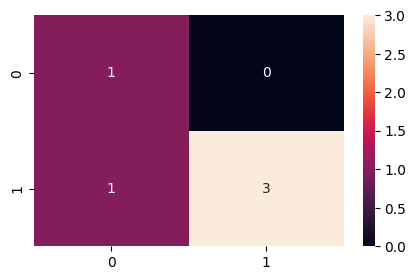

In [342]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cf,annot=True)